**SPAM EMAIL DETECTION WITH MACHINE LEARNING** <br/><br/>
In this project, we will use Python to create an email spam detection system. Our goal is to train a machine learning model that can classify emails as either spam or non-spam (ham). This will help us filter out unwanted and potentially harmful emails from our inbox. We'll follow the standard data science workflow, including data loading, preprocessing, feature extraction, model training, evaluation, and prediction. Let's begin building our email spam detector!

Understanding the Data

In [3]:
#importing libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter


#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df= pd.read_csv("spam.csv",encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5568,ham,Will ï¿½_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5573 non-null   object
 1   v2          5573 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# Downloading the stopwords dataset
#In spam detection:

#Words like "the", "is", "and", "are" don’t contribute much meaning.

#Removing them reduces noise and makes the model focus on important keywords (e.g., "win", "free", "offer", "buy now", which are typical in spam).


import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\KETAN
[nltk_data]     KHANDELWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# Drop unnecessary columns from the DataFrame

columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

In [10]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ï¿½_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [11]:
# Rename the columns "v1 and "v2" to new names

new_column_names = {"v1":"Category","v2":"Message"}
df.rename(columns = new_column_names,inplace = True)

In [12]:
df[df.duplicated()]

,Category,Message
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [13]:
#Drop duplicated values
df=df.drop_duplicates()
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ï¿½_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5170 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5170 non-null   object
 1   Message   5170 non-null   object
dtypes: object(2)
memory usage: 121.2+ KB


In [15]:
df.describe()


,Category,Message
count,5170,5170
unique,2,5170
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [16]:
df.shape

(5170, 2)

In [17]:
df['Category'].value_counts()

ham     4516
spam     654
Name: Category, dtype: int64

**Data Visualisation**

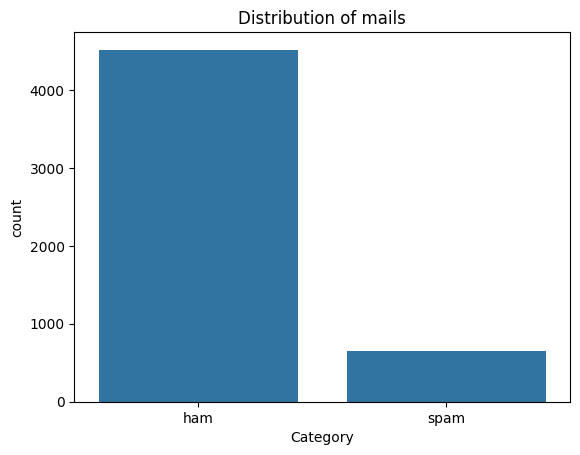

In [18]:
sns.countplot(data=df, x='Category')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

**Data Preprocessing**

In [19]:
# Fix NaN issue
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')  # Reload original data if needed
df = df[['v1', 'v2']]  # Keep only relevant columns
df.columns = ['Category', 'Message']  # Rename columns
df = df.drop_duplicates()  # Drop duplicates

# Apply correct mapping
df['Category'] = df['Category'].map({'spam': 0, 'ham': 1})

df.head()


,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
# Separate the feature (X) and target (Y) data

X = df["Message"]
Y = df["Category"]

In [21]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5568              Will ï¿½_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
5572    Market Weekly Wrap Nifty 50 formed a strong bu...
Name: Message, Length: 5170, dtype: object

In [22]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5568    1
5569    1
5570    1
5571    1
5572    0
Name: Category, Length: 5170, dtype: int64

In [23]:
# Split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [24]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5170,)
(4136,)
(1034,)


**Feature Extraction: TF-IDF**

In [25]:
# Create a TF-IDF vectorizer to convert text messages into numerical features

feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [26]:
# Convert the training and testing text messages into numerical features using TF-IDF

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [27]:
# Convert the target values into 0 and 1

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

In [28]:
print(X_train)

2228                       Those were my exact intentions
5530    I think that tantrum's finished so yeah I'll b...
2149                   Waaaat?? Lololo ok next time then!
5059                       I think i am disturbing her da
5052                          Lmao you know me so well...
                              ...                        
4740    Many more happy returns of the day. I wish you...
474     Nice line said by a broken heart- Plz don't cu...
3266                    Ok then i come n pick u at engin?
4016    Eek that's a lot of time especially since Amer...
879     U have a Secret Admirer who is looking 2 make ...
Name: Message, Length: 4136, dtype: object


In [29]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 31759 stored elements and shape (4136, 7414)>
  Coords	Values
  (0, 2569)	0.666440507616526
  (0, 3530)	0.7455582135607032
  (1, 6512)	0.3108833149765709
  (1, 6382)	0.5696098375599178
  (1, 2733)	0.43668979778680955
  (1, 7293)	0.33230070462456607
  (1, 3960)	0.27203540399945847
  (1, 5024)	0.4514102331692604
  (2, 6972)	0.6385481357759587
  (2, 3985)	0.6385481357759587
  (2, 4673)	0.2968835406911415
  (2, 6562)	0.31043955911060533
  (3, 6512)	0.43044829054982203
  (3, 2259)	0.7886804117374601
  (3, 2043)	0.4389732079573496
  (4, 3961)	0.8847868888949999
  (4, 3776)	0.4659958811400666
  (5, 6615)	0.19476951434611062
  (5, 1755)	0.2146339827508279
  (5, 6232)	0.2548341349679163
  (5, 2597)	0.2640656204073199
  (5, 6226)	0.24182308700866567
  (5, 5437)	0.15456936212902225
  (5, 4354)	0.2770766683665705
  (5, 4355)	0.2770766683665705
  :	:
  (4133, 4940)	0.4636891766052077
  (4133, 2484)	0.7337565036661379
  (4134, 6562)	0.192

**Model Training**

In [30]:
# Create a logistic regression model and train it on the training data

model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

**Model Evaluation and Prediction**

In [31]:
# Make predictions on the training data and calculate the accuracy

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [32]:
print("Accuracy on training data:",accuracy_on_training_data)

Accuracy on training data: 0.9615570599613152


In [33]:
# Make predictions on the test data and calculate the accuracy

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test,prediction_on_test_data)

In [36]:
print("Accuracy on test data:",accuracy_on_test_data)

Accuracy on test data: 0.9526112185686654


In [35]:
# Test the model with some custom email messages

input_mail = ["Congratulations! You've won a free vacation to an exotic island. Just click on the link below to claim your prize."]
input_data_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_data_features)

if (prediction)[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Spam Mail


In [37]:
input_mail = ["This is a friendly reminder about our meeting scheduled for tomorrow at 10:00 AM in the conference room. Please make sure to prepare your presentation and bring any necessary materials."]
input_data_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_data_features)

if (prediction)[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Ham Mail


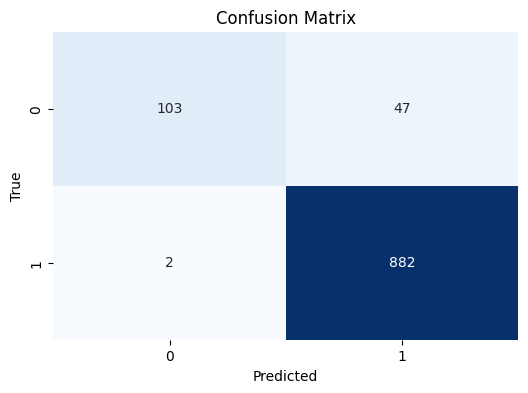

In [38]:
# Data visualization - Confusion Matrix

cm = confusion_matrix(Y_test, prediction_on_test_data)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

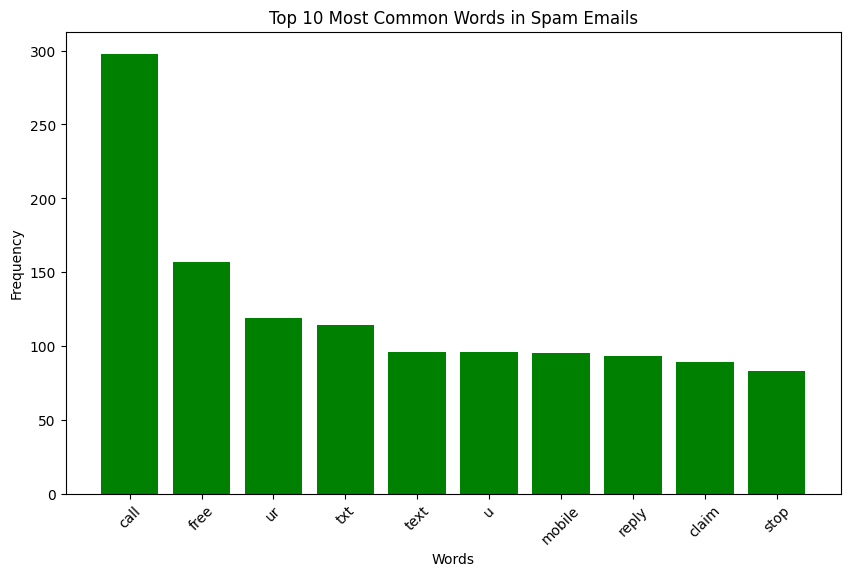

In [39]:
# Data visualization - Top 10 Most Common Words in Spam Emails

stop_words = set(stopwords.words('english'))
spam_words = " ".join(df[df['Category'] == 0]['Message']).split()
ham_words = " ".join(df[df['Category'] == 1]['Message']).split()

spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_word_freq.most_common(10)), color='g')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()

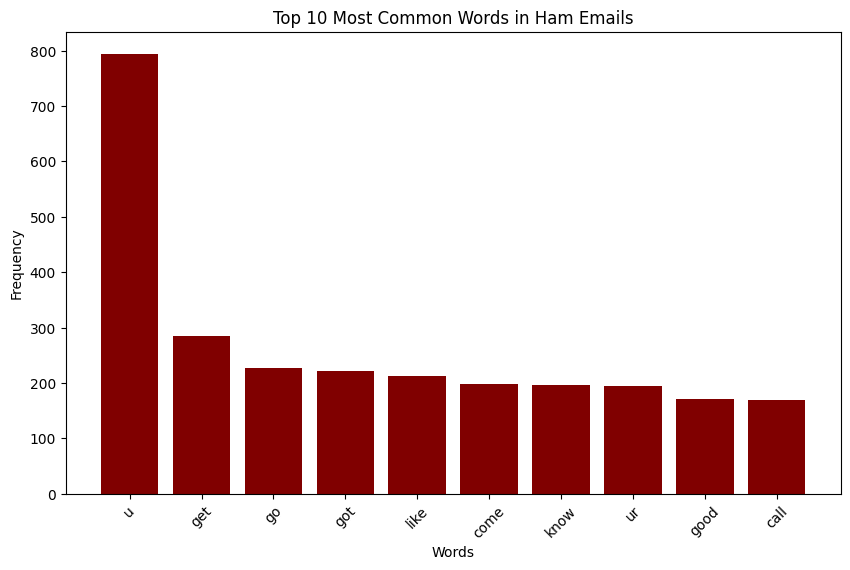

In [40]:
# Data visualization - Top 10 Most Common Words in Ham Emails

ham_word_freq = Counter([word.lower() for word in ham_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*ham_word_freq.most_common(10)), color='maroon')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Ham Emails')
plt.xticks(rotation=45)
plt.show()

In [41]:
import streamlit as st
import joblib  # Use joblib instead of pickle

# Load the saved model and vectorizer
model = joblib.load('spam_classifier_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Streamlit UI
st.title("📧 Real-Time Spam Email Detector")
st.write("Paste your email message below:")

user_input = st.text_area("Email Message:")

if st.button("Predict"):
    if user_input.strip() == "":
        st.warning("Please enter an email message!")
    else:
        # Transform the input message
        input_features = vectorizer.transform([user_input])

        # Predict
        prediction = model.predict(input_features)

        # Output result
        if prediction[0] == 0:
            st.error("🚫 It's a Spam Email!")
        else:
            st.success("✅ It's a Ham (Non-Spam) Email!")


2025-03-23 16:29:12.227 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 16:29:12.228 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 16:29:12.228 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 16:29:12.229 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 16:29:12.229 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 16:29:12.230 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 16:29:12.230 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 16:29:12.230 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar